# Imports

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Functions

In [9]:
def json_to_df(file_path):
    # Load the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extracting relevant data from each record
    extracted_data = []
    for record in data:
        client_name = record['sender']['name']
        correlation_id = record['correlationId']
        training_info = json.loads(record['data'])
        extracted_data.append({
            'client': client_name,
            'correlationId': correlation_id,
            'training_loss': training_info['training_loss'],
            'training_accuracy': training_info['training_accuracy'],
            'test_loss': training_info['test_loss'],
            'test_accuracy': training_info['test_accuracy']
        })

    # Creating a DataFrame from the extracted data
    df = pd.DataFrame(extracted_data)

    # Creating a mapping of correlationId to readable round numbers
    unique_correlation_ids = df['correlationId'].unique()
    round_mapping = {correlation_id: f'Round {i+1}' for i, correlation_id in enumerate(unique_correlation_ids)}

    # Applying the mapping to the DataFrame
    df['Round'] = df['correlationId'].map(round_mapping)

    # Initializing the aggregated data dictionary with lists for each metric
    aggregated_data = {
        'Round': [],
        'training_accuracy': [],
        'training_loss': [],
        'test_accuracy': [],
        'test_loss': []
    }

    # Aggregating data for each round
    for round_label in df['Round'].unique():
        round_data = df[df['Round'] == round_label]
        aggregated_data['Round'].extend([round_label] * len(round_data))
        aggregated_data['training_accuracy'].extend(round_data['training_accuracy'])
        aggregated_data['training_loss'].extend(round_data['training_loss'])
        aggregated_data['test_accuracy'].extend(round_data['test_accuracy'])
        aggregated_data['test_loss'].extend(round_data['test_loss'])

    # Converting aggregated data into a DataFrame for plotting
    df_aggregated = pd.DataFrame(aggregated_data)

    # Create copy of df
    df = df_aggregated.copy()

    # Group by Round and calculate mean for 
    df = df.groupby('Round').mean()

    # Sort by index
    df.index = df.index.astype(str)
    numeric_index = df.index.str.extract('(\d+)')[0].astype(int)
    df = df.iloc[numeric_index.argsort()]
    
    return df

# Solution

In [41]:
###############################################################################################
root = "Backdoor/50_clients_40_rounds/RESULT"
files = []
merged_files = ['0_merged.json','2_merged.json','4_merged.json','6_merged.json','8_merged.json','10_merged.json','12_merged.json','14_merged.json','16_merged.json','18_merged.json','20_merged.json']
file_labels = ["Baseline","2%","4%","6%","8%","10%","12%","14%","16%","18%","20%"]



In [43]:
dfs[0]

training_accuracy  training_loss  test_accuracy  test_loss
Round 1            0.106717       2.293895       0.111433   2.291978
Round 2            0.169578       2.279056       0.170733   2.276999
Round 3            0.216100       2.262471       0.219133   2.260217
Round 4            0.261839       2.243101       0.268467   2.240594
Round 5            0.290550       2.220218       0.297767   2.217383
Round 6            0.318994       2.193157       0.330967   2.189881
Round 7            0.341706       2.161264       0.351267   2.157373
Round 8            0.360878       2.124180       0.369133   2.119549
Round 9            0.385694       2.081420       0.396533   2.075877
Round 10           0.419033       2.032478       0.429800   2.025878
Round 11           0.458017       1.976697       0.469800   1.968860
Round 12           0.500483       1.913386       0.510000   1.904074
Round 13           0.538494       1.842043       0.546800   1.830991
Round 14           0.571989       1.763184       0.579433   1.750211
Round 15           0.600300       1.678267       0.606333   1.663322
Round 16           0.625283       1.589069       0.633667   1.572150
Round 17           0.649711       1.497575       0.656400   1.478775
Round 18           0.673139       1.406310       0.682067   1.385756
Round 19           0.694844       1.317757       0.705667   1.295640
Round 20           0.717606       1.233393       0.729467   1.209898
Round 21           0.738106       1.154454       0.751733   1.129778
Round 22           0.753394       1.081964       0.766600   1.056313
Round 23           0.764522       1.016499       0.778033   0.990085
Round 24           0.774117       0.958100       0.786167   0.931119
Round 25           0.781961       0.906361       0.792733   0.878978
Round 26           0.789061       0.860609       0.798367   0.832971
Round 27           0.796006       0.820110       0.804000   0.792343
Round 28           0.802333       0.784162       0.809433   0.756368
Round 29           0.808056       0.752119       0.815100   0.724379
Round 30           0.813600       0.723424       0.820967   0.695801
Round 31           0.818533       0.697608       0.826500   0.670156
Round 32           0.823233       0.674267       0.832333   0.647033
Round 33           0.827667       0.653074       0.836200   0.626082
Round 34           0.831772       0.633750       0.840600   0.607028
Round 35           0.835933       0.616061       0.844633   0.589636
Round 36           0.839678       0.599822       0.848200   0.573710
Round 37           0.843300       0.584867       0.851600   0.559076
Round 38           0.847011       0.571057       0.853900   0.545594
Round 39           0.850283       0.558273       0.857067   0.533144

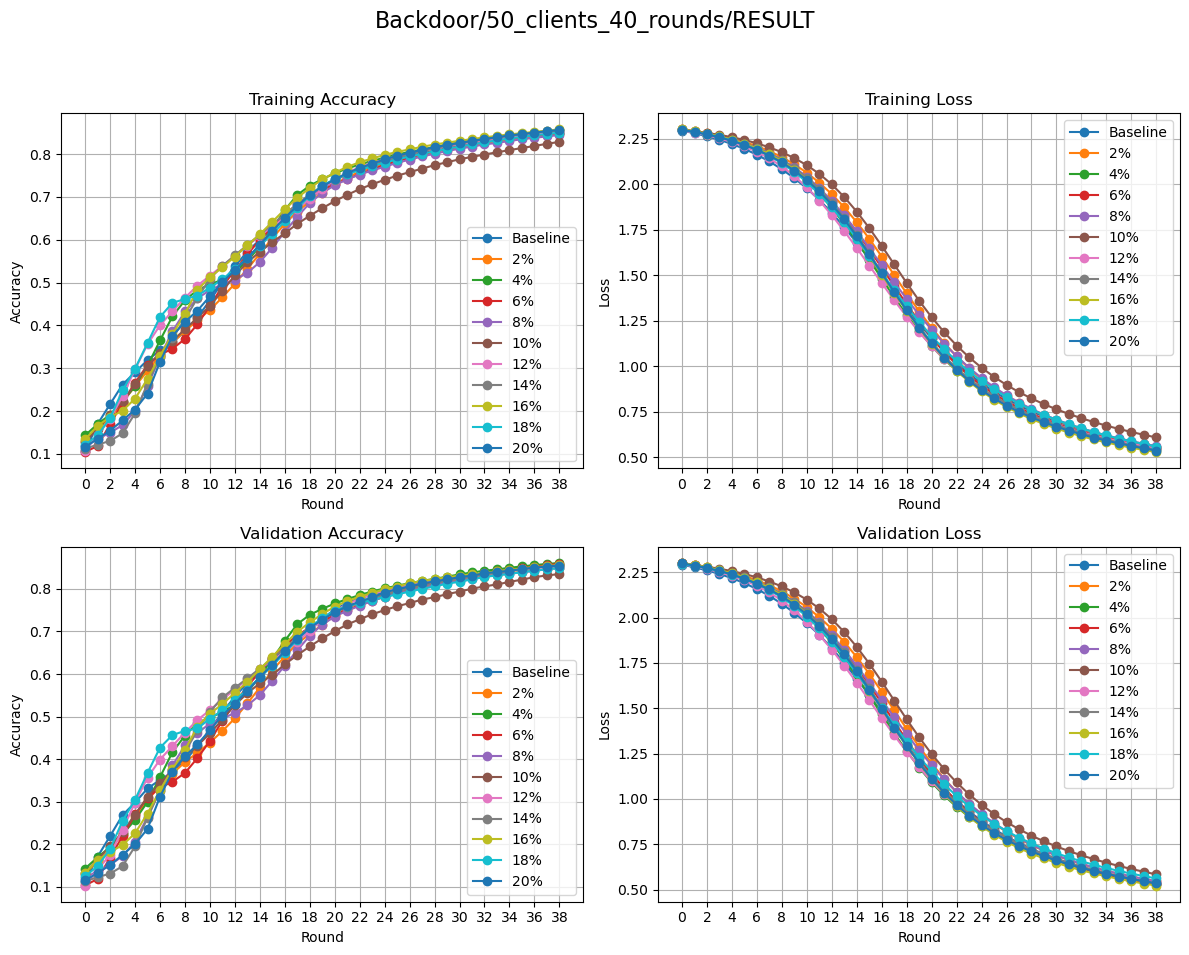

In [42]:
file_paths = [root+"/"+file for file in files]


# Load raw json data from files
dfs = []
for path in file_paths:
    dfs.append(json_to_df(path))  # Each json becomes a df with 4 columns
    

# If any merged files are to be printed (handled seperatly because they are already dfs but in .json format)
if merged_files != None:
    merged_file_paths = [root+"/"+file for file in merged_files]
    for filename in merged_file_paths:
        dfs.append(pd.read_json(filename, orient='index'))
    

# Create 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over each dataframe and plot on the same axes
for df, label in zip(dfs, file_labels):
    axs[0, 0].plot(df.index, df['training_accuracy'], marker='o', label=label)
    axs[0, 1].plot(df.index, df['training_loss'], marker='o', label=label)
    axs[1, 0].plot(df.index, df['test_accuracy'], marker='o', label=label)
    axs[1, 1].plot(df.index, df['test_loss'], marker='o', label=label)

    for ax in axs.flat:
        # Get current x-ticks and calculate new ticks with step of 2
        min_tick = int(np.floor(min(ax.get_xticks())))
        max_tick = int(np.ceil(max(ax.get_xticks())))
        new_ticks = np.arange(min_tick, max_tick + 2, 2)  # Adjust step here

        ax.set_xticks(new_ticks)
        ax.set_xticklabels(new_ticks)

        ax.set_xlabel('Round')
        ax.set_ylabel('Accuracy' if 'accuracy' in ax.get_title().lower() else 'Loss')


    axs[0, 0].set_xlabel('Round')
    axs[0, 1].set_xlabel('Round')
    axs[1, 0].set_xlabel('Round')
    axs[1, 1].set_xlabel('Round')
    
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 1].set_ylabel('Loss')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 1].set_ylabel('Loss')
    
    
    
axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 0].grid()
axs[1, 1].grid()

axs[0, 0].set_title('Training Accuracy')
axs[0, 1].set_title('Training Loss')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 1].set_title('Validation Loss')

# Add legends
for ax in axs.flat:
    ax.legend()

# Title
plt.suptitle(root, fontsize=16)


# Adjust layout to accommodate the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Savefig
plt.savefig(root+"/comparison.png")
